In [3]:
import numpy as np
import editdistance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(context='paper', style='ticks', font_scale=1)

## Sampling pseudoword pairs from the ARC database

All of the pseudowords were retreived from the [ARC database](http://www.cogsci.mq.edu.au/research/resources/nwdb/). Read all the 3-letter pseudowords:

In [4]:
letters_3 = pd.read_csv('3_letters.txt', header=None, delim_whitespace=True)
letters_3.columns = ['word', 'transcription']
letters_3.head(10)

,word,transcription
0,rop,rQp
1,poy,p4
2,vev,vEv
3,tib,tIb
4,wat,w{t
5,kib,kIb
6,gwu,gwu
7,suv,sVv
8,oth,QT
9,sme,smi


Read all the 7-letter pseudowords:

In [5]:
letters_7 = pd.read_csv('7_letters.txt', header=None, delim_whitespace=True)
letters_7.columns = ['word', 'transcription']
letters_7.head(10)

,word,transcription
0,swaught,sw9t
1,skorgue,sk9g
2,stroute,str6t
3,thweige,Tw1_
4,phlawse,fl9s
5,scroign,skr4n
6,snaitch,sn1J
7,stroath,str5T
8,prourth,pr9T
9,strerth,str3T


Find all the pairs with edit distance of 7 from the list of all combinations of 3-letter and 7-letter pseudowords:

In [6]:
# initialize matrix
lev_matrix = np.zeros((len(letters_7), len(letters_3)))

# fill matrix
for i in range(len(letters_7)):
    for j in range(len(letters_3)):
        lev_matrix[i, j] = editdistance.eval(letters_7['word'][i], letters_3['word'][j])

In [7]:
# find pairs where all the levenstein distances are the same
pairs = []

for i in range(len(letters_7)):
    for j in range(len(letters_3)):
        if lev_matrix[i, j] == 7:
            pairs.append((letters_7['word'][i], letters_3['word'][j]))


In [8]:
# select ten random unique pairs
pairs = list(set(pairs))

# random choice knowing pairs is a lsit of tuples so from rnage
i = np.random.choice(range(len(pairs)), size=10, replace=False)

# select 10 random pairs
pairs_ = [pairs[j] for j in i]

In [9]:
pairs_

[('dwusque', 'cag'),
 ('splonch', 'tha'),
 ('phlurve', 'zop'),
 ('thraugh', 'gwy'),
 ('brource', 'vap'),
 ('shreeth', 'bis'),
 ('bluiche', 'tra'),
 ('splelch', 'juy'),
 ('phirque', 'ock'),
 ('shrench', 'dat')]

In [10]:
pairs_ = [('swourge', 'fep'),
        ('phlolve', 'gup'),
        ('phoothe', 'eep'),
        ('spleese', 'onk'),
        ('phrurnt', 'woc'),
        ('phladge', 'yun'),
        ('splulge', 'feb'),
        ('sneathe', 'dob'),
        ('phlerge', 'zay'),
        ('shriege', 'zup')]

In [16]:
for i in range(10):
    print(f"{pairs_[i][0]} & {pairs_[i][1]} \\\\")

swourge & fep \\
phlolve & gup \\
phoothe & eep \\
spleese & onk \\
phrurnt & woc \\
phladge & yun \\
splulge & feb \\
sneathe & dob \\
phlerge & zay \\
shriege & zup \\


In [11]:
# print 7 and 3 letter words as lists
print([pair[0] for pair in pairs_])
print([pair[1] for pair in pairs_])

['swourge', 'phlolve', 'phoothe', 'spleese', 'phrurnt', 'phladge', 'splulge', 'sneathe', 'phlerge', 'shriege']
['fep', 'gup', 'eep', 'onk', 'woc', 'yun', 'feb', 'dob', 'zay', 'zup']


Plot the matrix with the sampled pairs:

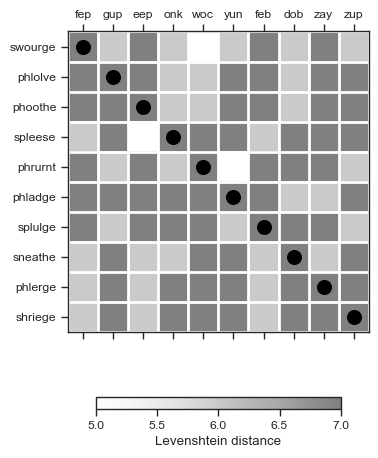

In [17]:
# Initialize matrix
lev_matrix = np.zeros((len(pairs_), len(pairs_)))

# Fill matrix
for i in range(len(pairs_)):
    for j in range(len(pairs_)):
        lev_matrix[i, j] = editdistance.eval(pairs_[i][0], pairs_[j][1])

# Plot matrix with white borders between cells
fig, ax = plt.subplots()
cax = ax.matshow(lev_matrix, cmap='Greys', interpolation='nearest', alpha=0.5, vmax=7)

# Add colorbar
cbar = plt.colorbar(cax, label='Levenshtein distance', shrink=0.4, orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('bottom')

# Add xticks
plt.xticks(np.arange(len(pairs_)), [p[1] for p in pairs_], rotation=90)

# Add yticks
plt.yticks(np.arange(len(pairs_)), [p[0] for p in pairs_])

# Add dots at the diagonal
plt.scatter(range(len(pairs_)), range(len(pairs_)), color='black', s=100)

# Draw gridlines between cells to create white borders
ax.set_xticks(np.arange(-0.5, len(pairs_), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(pairs_), 1), minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

# rotate the xticks
plt.xticks(rotation=360)

# Turn gridlines off for major ticks
ax.tick_params(which='minor', size=0)

plt.tight_layout()

# save figure
plt.savefig('lev_matrix.pdf', dpi=300)

# Show plot
plt.show()